<a href="https://colab.research.google.com/github/phanducnghiaa/Login-demo/blob/main/nmist_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 691.5/691.5 kB 3.9 MB/s eta 0:00:00


In [3]:
import os
import torch
import numpy as np
from PIL import Image
from ultralytics import YOLO
from matplotlib import pyplot as plt
from torchvision import transforms as T
from IPython import display
from IPython.display import display, Image
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 413, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are ('train', 'val', 'predict', 'export', 'track', 'benchmark').

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ('detect', 'segment', 'classify', 'pose', 'obb')
                MODE (required) is one of ('train', 'val', 'predict', 'export', 'track', 'benchmark')
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at ht

In [4]:
!nvidia-smi

Sun Jan  7 10:47:49 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [7]:
from ultralytics import YOLO

model = YOLO('yolov8m-cls.pt')

results = model.train(data='mnist', epochs=100, imgsz=32)

100%|██████████| 32.7M/32.7M [00:00<00:00, 191MB/s]


Ultralytics YOLOv8.0.236 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8m-cls.pt, data=mnist, epochs=100, time=None, patience=50, batch=16, imgsz=32, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, lin

100%|██████████| 28.2M/28.2M [00:00<00:00, 183MB/s]
Unzipping /content/datasets/mnist.zip to /content/datasets/mnist...: 100%|██████████| 70023/70023 [00:09<00:00, 7293.06file/s]

Dataset download success ✅ (11.3s), saved to /content/datasets/mnist



train: /content/datasets/mnist/train... found 60000 images in 10 classes ✅ 
val: None...
test: /content/datasets/mnist/test... found 10000 images in 10 classes ✅ 
Overriding model.yaml nc=1000 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]            

100%|██████████| 6.23M/6.23M [00:00<00:00, 81.2MB/s]


WARNING ⚠️ NMS time limit 0.550s exceeded
AMP: checks passed ✅


train: Scanning /content/datasets/mnist/train... 60000 images, 0 corrupt: 100%|██████████| 60000/60000 [00:08<00:00, 7338.98it/s]


train: New cache created: /content/datasets/mnist/train.cache


val: Scanning /content/datasets/mnist/test... 10000 images, 0 corrupt: 100%|██████████| 10000/10000 [00:01<00:00, 8133.54it/s]


val: New cache created: /content/datasets/mnist/test.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 38 weight(decay=0.0), 39 weight(decay=0.0005), 39 bias(decay=0.0)
WARNING ⚠️ TensorBoard graph visualization failure Expected more than 1 value per channel when training, got input size torch.Size([1, 768, 1, 1])
100 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/100     0.598G      2.738         16         32:   0%|          | 11/3750 [00:01<05:39, 11.01it/s]

      1/100     0.598G      2.742         16         32:   1%|          | 27/3750 [00:02<03:35, 17.27it/s]
100%|██████████| 755k/755k [00:00<00:00, 15.6MB/s]
      1/100     0.604G       1.39         16         32: 100%|██████████| 3750/3750 [03:23<00:00, 18.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:07<00:00, 43.32it/s]

                   all      0.926      0.998



      Epoch    GPU_mem       loss  Instances       Size


      2/100     0.604G     0.6735         16         32: 100%|██████████| 3750/3750 [03:07<00:00, 19.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:07<00:00, 39.66it/s]


                   all      0.949      0.997

      Epoch    GPU_mem       loss  Instances       Size


      3/100     0.604G     0.7707         16         32: 100%|██████████| 3750/3750 [03:00<00:00, 20.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 50.24it/s]

                   all       0.93      0.998



      Epoch    GPU_mem       loss  Instances       Size


      4/100     0.604G     0.8929         16         32: 100%|██████████| 3750/3750 [02:58<00:00, 21.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:07<00:00, 43.01it/s]

                   all      0.971      0.999



      Epoch    GPU_mem       loss  Instances       Size


      5/100     0.604G     0.5692         16         32: 100%|██████████| 3750/3750 [03:01<00:00, 20.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 49.86it/s]

                   all      0.974      0.999



      Epoch    GPU_mem       loss  Instances       Size


      6/100     0.606G     0.4322         16         32: 100%|██████████| 3750/3750 [03:04<00:00, 20.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 48.36it/s]

                   all      0.976          1



      Epoch    GPU_mem       loss  Instances       Size


      7/100     0.604G      0.396         16         32: 100%|██████████| 3750/3750 [03:04<00:00, 20.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 49.71it/s]

                   all      0.985          1



      Epoch    GPU_mem       loss  Instances       Size


      8/100     0.604G     0.3634         16         32: 100%|██████████| 3750/3750 [03:02<00:00, 20.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:07<00:00, 40.70it/s]

                   all      0.986          1



      Epoch    GPU_mem       loss  Instances       Size


      9/100     0.604G     0.3002         16         32: 100%|██████████| 3750/3750 [03:04<00:00, 20.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:07<00:00, 40.12it/s]

                   all      0.987          1



      Epoch    GPU_mem       loss  Instances       Size


     10/100     0.604G     0.2804         16         32: 100%|██████████| 3750/3750 [03:02<00:00, 20.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:07<00:00, 40.34it/s]

                   all      0.987          1



      Epoch    GPU_mem       loss  Instances       Size


     11/100     0.604G     0.2853         16         32: 100%|██████████| 3750/3750 [03:05<00:00, 20.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 48.78it/s]

                   all      0.988          1



      Epoch    GPU_mem       loss  Instances       Size


     12/100     0.604G     0.2495         16         32: 100%|██████████| 3750/3750 [03:03<00:00, 20.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:07<00:00, 39.91it/s]

                   all      0.989          1



      Epoch    GPU_mem       loss  Instances       Size


     13/100     0.604G     0.2479         16         32: 100%|██████████| 3750/3750 [03:05<00:00, 20.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:07<00:00, 39.92it/s]


                   all      0.989          1

      Epoch    GPU_mem       loss  Instances       Size


     14/100     0.604G     0.2306         16         32: 100%|██████████| 3750/3750 [03:06<00:00, 20.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:07<00:00, 41.30it/s]

                   all      0.988          1



      Epoch    GPU_mem       loss  Instances       Size


     15/100     0.604G     0.2335         16         32: 100%|██████████| 3750/3750 [03:06<00:00, 20.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 47.09it/s]


                   all       0.99          1

      Epoch    GPU_mem       loss  Instances       Size


     16/100     0.604G     0.2332         16         32: 100%|██████████| 3750/3750 [03:03<00:00, 20.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 48.93it/s]

                   all       0.99          1



      Epoch    GPU_mem       loss  Instances       Size


     17/100     0.604G     0.2297         16         32: 100%|██████████| 3750/3750 [03:03<00:00, 20.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 48.79it/s]

                   all      0.991          1



      Epoch    GPU_mem       loss  Instances       Size


     18/100     0.604G     0.2167         16         32: 100%|██████████| 3750/3750 [03:04<00:00, 20.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 49.61it/s]


                   all      0.991          1

      Epoch    GPU_mem       loss  Instances       Size


     19/100     0.604G     0.2136         16         32: 100%|██████████| 3750/3750 [03:01<00:00, 20.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 48.95it/s]

                   all      0.991          1



      Epoch    GPU_mem       loss  Instances       Size


     20/100     0.604G     0.2018         16         32: 100%|██████████| 3750/3750 [03:00<00:00, 20.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 49.68it/s]


                   all      0.991          1

      Epoch    GPU_mem       loss  Instances       Size


     21/100     0.604G      0.201         16         32: 100%|██████████| 3750/3750 [02:59<00:00, 20.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:07<00:00, 41.04it/s]

                   all      0.991          1



      Epoch    GPU_mem       loss  Instances       Size


     22/100     0.604G     0.2006         16         32: 100%|██████████| 3750/3750 [02:59<00:00, 20.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 50.85it/s]

                   all      0.991          1



      Epoch    GPU_mem       loss  Instances       Size


     23/100     0.604G     0.2035         16         32: 100%|██████████| 3750/3750 [03:03<00:00, 20.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 49.59it/s]

                   all      0.991          1



      Epoch    GPU_mem       loss  Instances       Size


     24/100     0.604G     0.1922         16         32: 100%|██████████| 3750/3750 [03:02<00:00, 20.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 49.31it/s]

                   all      0.991          1



      Epoch    GPU_mem       loss  Instances       Size


     25/100     0.604G     0.1911         16         32: 100%|██████████| 3750/3750 [03:02<00:00, 20.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 48.91it/s]

                   all      0.991          1



      Epoch    GPU_mem       loss  Instances       Size


     26/100     0.604G     0.2046         16         32: 100%|██████████| 3750/3750 [03:02<00:00, 20.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 49.43it/s]

                   all      0.991          1



      Epoch    GPU_mem       loss  Instances       Size


     27/100     0.604G     0.1958         16         32: 100%|██████████| 3750/3750 [03:03<00:00, 20.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 49.05it/s]

                   all      0.991          1



      Epoch    GPU_mem       loss  Instances       Size


     28/100     0.604G     0.2102         16         32: 100%|██████████| 3750/3750 [03:04<00:00, 20.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 49.27it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     29/100     0.604G     0.2002         16         32: 100%|██████████| 3750/3750 [03:02<00:00, 20.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 48.74it/s]

                   all      0.991          1



      Epoch    GPU_mem       loss  Instances       Size


     30/100     0.604G     0.1969         16         32: 100%|██████████| 3750/3750 [03:02<00:00, 20.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 47.71it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     31/100     0.604G     0.1904         16         32: 100%|██████████| 3750/3750 [03:03<00:00, 20.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 46.46it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     32/100     0.604G      0.187         16         32: 100%|██████████| 3750/3750 [03:04<00:00, 20.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 46.32it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     33/100     0.604G     0.1894         16         32: 100%|██████████| 3750/3750 [03:04<00:00, 20.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 49.40it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     34/100     0.604G       0.18         16         32: 100%|██████████| 3750/3750 [03:03<00:00, 20.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 48.61it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     35/100     0.604G     0.1802         16         32: 100%|██████████| 3750/3750 [03:03<00:00, 20.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 48.93it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     36/100     0.604G     0.1867         16         32: 100%|██████████| 3750/3750 [03:04<00:00, 20.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 49.16it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     37/100     0.604G      0.185         16         32: 100%|██████████| 3750/3750 [03:04<00:00, 20.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 49.45it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     38/100     0.606G     0.1758         16         32: 100%|██████████| 3750/3750 [03:01<00:00, 20.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 50.64it/s]

                   all      0.993          1



      Epoch    GPU_mem       loss  Instances       Size


     39/100     0.604G     0.1804         16         32: 100%|██████████| 3750/3750 [03:00<00:00, 20.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 45.04it/s]

                   all      0.993          1



      Epoch    GPU_mem       loss  Instances       Size


     40/100     0.604G     0.1772         16         32: 100%|██████████| 3750/3750 [03:01<00:00, 20.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:07<00:00, 41.64it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     41/100     0.604G     0.1725         16         32: 100%|██████████| 3750/3750 [03:01<00:00, 20.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:07<00:00, 40.97it/s]

                   all      0.993          1



      Epoch    GPU_mem       loss  Instances       Size


     42/100     0.604G     0.1729         16         32: 100%|██████████| 3750/3750 [03:03<00:00, 20.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 46.42it/s]

                   all      0.993          1



      Epoch    GPU_mem       loss  Instances       Size


     43/100     0.604G     0.1688         16         32: 100%|██████████| 3750/3750 [03:04<00:00, 20.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 46.90it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     44/100     0.604G     0.1602         16         32: 100%|██████████| 3750/3750 [03:02<00:00, 20.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:07<00:00, 42.29it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     45/100     0.583G     0.1645         16         32: 100%|██████████| 3750/3750 [03:02<00:00, 20.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:07<00:00, 40.84it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     46/100     0.585G     0.1641         16         32: 100%|██████████| 3750/3750 [03:03<00:00, 20.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:07<00:00, 40.79it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     47/100     0.583G     0.1705         16         32: 100%|██████████| 3750/3750 [03:06<00:00, 20.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:07<00:00, 40.54it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     48/100     0.583G     0.1694         16         32: 100%|██████████| 3750/3750 [03:06<00:00, 20.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:07<00:00, 40.76it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     49/100     0.583G     0.1724         16         32: 100%|██████████| 3750/3750 [03:10<00:00, 19.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:07<00:00, 44.48it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     50/100     0.585G     0.1696         16         32: 100%|██████████| 3750/3750 [03:09<00:00, 19.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 47.55it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     51/100     0.585G     0.1656         16         32: 100%|██████████| 3750/3750 [03:09<00:00, 19.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:07<00:00, 39.50it/s]


                   all      0.992          1

      Epoch    GPU_mem       loss  Instances       Size


     52/100     0.583G     0.1583         16         32: 100%|██████████| 3750/3750 [03:08<00:00, 19.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:07<00:00, 39.68it/s]

                   all      0.993          1



      Epoch    GPU_mem       loss  Instances       Size


     53/100     0.583G     0.1596         16         32: 100%|██████████| 3750/3750 [03:08<00:00, 19.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:07<00:00, 42.74it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     54/100     0.583G     0.1532         16         32: 100%|██████████| 3750/3750 [03:09<00:00, 19.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 48.34it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     55/100     0.583G     0.1476         16         32: 100%|██████████| 3750/3750 [03:07<00:00, 20.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 48.35it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     56/100     0.585G     0.1513         16         32: 100%|██████████| 3750/3750 [03:06<00:00, 20.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:07<00:00, 42.12it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     57/100     0.585G     0.1539         16         32: 100%|██████████| 3750/3750 [03:04<00:00, 20.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 45.74it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     58/100     0.583G     0.1445         16         32: 100%|██████████| 3750/3750 [03:03<00:00, 20.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 48.83it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     59/100     0.583G     0.1487         16         32: 100%|██████████| 3750/3750 [03:07<00:00, 19.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:07<00:00, 43.45it/s]

                   all      0.993          1



      Epoch    GPU_mem       loss  Instances       Size


     60/100     0.583G     0.1429         16         32: 100%|██████████| 3750/3750 [03:07<00:00, 19.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:07<00:00, 39.42it/s]

                   all      0.993          1



      Epoch    GPU_mem       loss  Instances       Size


     61/100     0.583G     0.1465         16         32: 100%|██████████| 3750/3750 [03:08<00:00, 19.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:07<00:00, 40.43it/s]

                   all      0.993          1



      Epoch    GPU_mem       loss  Instances       Size


     62/100     0.583G     0.1399         16         32: 100%|██████████| 3750/3750 [03:10<00:00, 19.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 49.11it/s]

                   all      0.993          1



      Epoch    GPU_mem       loss  Instances       Size


     63/100     0.587G     0.1409         16         32: 100%|██████████| 3750/3750 [03:07<00:00, 19.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 47.78it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     64/100     0.583G     0.1384         16         32: 100%|██████████| 3750/3750 [03:09<00:00, 19.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:07<00:00, 39.17it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     65/100     0.583G     0.1307         16         32: 100%|██████████| 3750/3750 [03:09<00:00, 19.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:07<00:00, 39.41it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     66/100     0.583G     0.1347         16         32: 100%|██████████| 3750/3750 [03:11<00:00, 19.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 48.43it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     67/100     0.583G     0.1295         16         32: 100%|██████████| 3750/3750 [03:08<00:00, 19.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 48.72it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     68/100     0.583G     0.1313         16         32: 100%|██████████| 3750/3750 [03:07<00:00, 20.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:07<00:00, 42.61it/s]


                   all      0.992          1

      Epoch    GPU_mem       loss  Instances       Size


     69/100     0.583G      0.126         16         32: 100%|██████████| 3750/3750 [03:07<00:00, 20.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:08<00:00, 38.99it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     70/100     0.583G     0.1246         16         32: 100%|██████████| 3750/3750 [03:10<00:00, 19.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:07<00:00, 42.38it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     71/100     0.583G     0.1241         16         32: 100%|██████████| 3750/3750 [03:09<00:00, 19.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 48.17it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     72/100     0.583G     0.1161         16         32: 100%|██████████| 3750/3750 [03:11<00:00, 19.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 45.32it/s]

                   all      0.993          1



      Epoch    GPU_mem       loss  Instances       Size


     73/100     0.583G     0.1219         16         32: 100%|██████████| 3750/3750 [03:12<00:00, 19.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 46.42it/s]

                   all      0.993          1



      Epoch    GPU_mem       loss  Instances       Size


     74/100     0.583G     0.1243         16         32: 100%|██████████| 3750/3750 [03:05<00:00, 20.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 45.19it/s]


                   all      0.993          1

      Epoch    GPU_mem       loss  Instances       Size


     75/100     0.583G     0.1201         16         32: 100%|██████████| 3750/3750 [03:05<00:00, 20.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:07<00:00, 41.93it/s]

                   all      0.993          1



      Epoch    GPU_mem       loss  Instances       Size


     76/100     0.583G     0.1194         16         32: 100%|██████████| 3750/3750 [03:06<00:00, 20.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:07<00:00, 41.41it/s]


                   all      0.993          1

      Epoch    GPU_mem       loss  Instances       Size


     77/100     0.583G     0.1165         16         32: 100%|██████████| 3750/3750 [03:06<00:00, 20.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:07<00:00, 40.30it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


     78/100     0.583G     0.1158         16         32: 100%|██████████| 3750/3750 [03:08<00:00, 19.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:07<00:00, 39.53it/s]

                   all      0.993          1



      Epoch    GPU_mem       loss  Instances       Size


     79/100     0.583G     0.1091         16         32: 100%|██████████| 3750/3750 [03:08<00:00, 19.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:07<00:00, 41.95it/s]

                   all      0.993          1



      Epoch    GPU_mem       loss  Instances       Size


     80/100     0.583G     0.1158         16         32: 100%|██████████| 3750/3750 [03:09<00:00, 19.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 48.87it/s]

                   all      0.993          1



      Epoch    GPU_mem       loss  Instances       Size


     81/100     0.583G     0.1106         16         32: 100%|██████████| 3750/3750 [03:09<00:00, 19.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 49.36it/s]


                   all      0.993          1

      Epoch    GPU_mem       loss  Instances       Size


     82/100     0.583G      0.107         16         32: 100%|██████████| 3750/3750 [03:07<00:00, 19.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:07<00:00, 42.87it/s]


                   all      0.993          1

      Epoch    GPU_mem       loss  Instances       Size


     83/100     0.583G     0.1091         16         32: 100%|██████████| 3750/3750 [03:09<00:00, 19.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 47.90it/s]

                   all      0.993          1



      Epoch    GPU_mem       loss  Instances       Size


     84/100     0.583G     0.1103         16         32: 100%|██████████| 3750/3750 [03:12<00:00, 19.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:07<00:00, 42.84it/s]


                   all      0.993          1

      Epoch    GPU_mem       loss  Instances       Size


     85/100     0.583G     0.1057         16         32: 100%|██████████| 3750/3750 [03:13<00:00, 19.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:07<00:00, 43.29it/s]

                   all      0.993          1



      Epoch    GPU_mem       loss  Instances       Size


     86/100     0.583G     0.1049         16         32: 100%|██████████| 3750/3750 [03:13<00:00, 19.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:08<00:00, 39.05it/s]

                   all      0.993          1



      Epoch    GPU_mem       loss  Instances       Size


     87/100     0.583G     0.1031         16         32: 100%|██████████| 3750/3750 [03:15<00:00, 19.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:07<00:00, 42.33it/s]


                   all      0.993          1

      Epoch    GPU_mem       loss  Instances       Size


     88/100     0.583G    0.09466         16         32: 100%|██████████| 3750/3750 [03:15<00:00, 19.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:07<00:00, 40.24it/s]

                   all      0.993          1



      Epoch    GPU_mem       loss  Instances       Size


     89/100     0.583G     0.0926         16         32: 100%|██████████| 3750/3750 [03:14<00:00, 19.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:07<00:00, 42.66it/s]

                   all      0.993          1



      Epoch    GPU_mem       loss  Instances       Size


     90/100     0.583G    0.09111         16         32: 100%|██████████| 3750/3750 [03:15<00:00, 19.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:07<00:00, 43.17it/s]

                   all      0.993          1



      Epoch    GPU_mem       loss  Instances       Size


     91/100     0.583G    0.08975         16         32: 100%|██████████| 3750/3750 [03:18<00:00, 18.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:07<00:00, 41.35it/s]

                   all      0.993          1



      Epoch    GPU_mem       loss  Instances       Size


     92/100     0.583G    0.08863         16         32: 100%|██████████| 3750/3750 [03:16<00:00, 19.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 47.26it/s]

                   all      0.993          1



      Epoch    GPU_mem       loss  Instances       Size


     93/100     0.583G    0.08519         16         32: 100%|██████████| 3750/3750 [03:17<00:00, 19.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:07<00:00, 39.71it/s]

                   all      0.993          1



      Epoch    GPU_mem       loss  Instances       Size


     94/100     0.583G    0.08696         16         32: 100%|██████████| 3750/3750 [03:18<00:00, 18.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:08<00:00, 38.91it/s]

                   all      0.993          1



      Epoch    GPU_mem       loss  Instances       Size


     95/100     0.583G    0.08018         16         32: 100%|██████████| 3750/3750 [03:20<00:00, 18.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 45.12it/s]

                   all      0.993          1



      Epoch    GPU_mem       loss  Instances       Size


     96/100     0.585G    0.08183         16         32: 100%|██████████| 3750/3750 [03:21<00:00, 18.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:08<00:00, 38.26it/s]


                   all      0.993          1

      Epoch    GPU_mem       loss  Instances       Size


     97/100     0.583G    0.07855         16         32: 100%|██████████| 3750/3750 [03:21<00:00, 18.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 46.27it/s]

                   all      0.993          1



      Epoch    GPU_mem       loss  Instances       Size


     98/100     0.583G    0.07445         16         32: 100%|██████████| 3750/3750 [03:27<00:00, 18.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:08<00:00, 38.83it/s]

                   all      0.993          1



      Epoch    GPU_mem       loss  Instances       Size


     99/100     0.583G    0.07341         16         32: 100%|██████████| 3750/3750 [03:21<00:00, 18.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:08<00:00, 38.73it/s]

                   all      0.993          1



      Epoch    GPU_mem       loss  Instances       Size


    100/100     0.583G    0.07262         16         32: 100%|██████████| 3750/3750 [03:20<00:00, 18.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:08<00:00, 38.38it/s]


                   all      0.993          1

100 epochs completed in 5.580 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 31.7MB
Optimizer stripped from runs/classify/train/weights/best.pt, 31.7MB

Validating runs/classify/train/weights/best.pt...
Ultralytics YOLOv8.0.236 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-cls summary (fused): 103 layers, 15775466 parameters, 0 gradients, 41.6 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /content/datasets/mnist/train... found 60000 images in 10 classes ✅ 
val: None...
test: /content/datasets/mnist/test... found 10000 images in 10 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:07<00:00, 44.38it/s]


                   all      0.993          1
Speed: 0.0ms preprocess, 0.5ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train
Results saved to runs/classify/train


In [8]:
!yolo task=classify mode=predict predict model=/content/runs/classify/train/weights/best.pt source='https://thorpham.github.io/assets/images/digit-16bb6bbd28eb6a01f8a3acae486973ef.jpg'

Ultralytics YOLOv8.0.236 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-cls summary (fused): 103 layers, 15775466 parameters, 0 gradients, 41.6 GFLOPs

100% 56.4k/56.4k [00:00<00:00, 5.34MB/s]
image 1/1 /content/digit-16bb6bbd28eb6a01f8a3acae486973ef.jpg: 32x32 0 0.27, 1 0.23, 7 0.16, 4 0.11, 6 0.07, 5.4ms
Speed: 109.8ms preprocess, 5.4ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)
Results saved to runs/classify/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


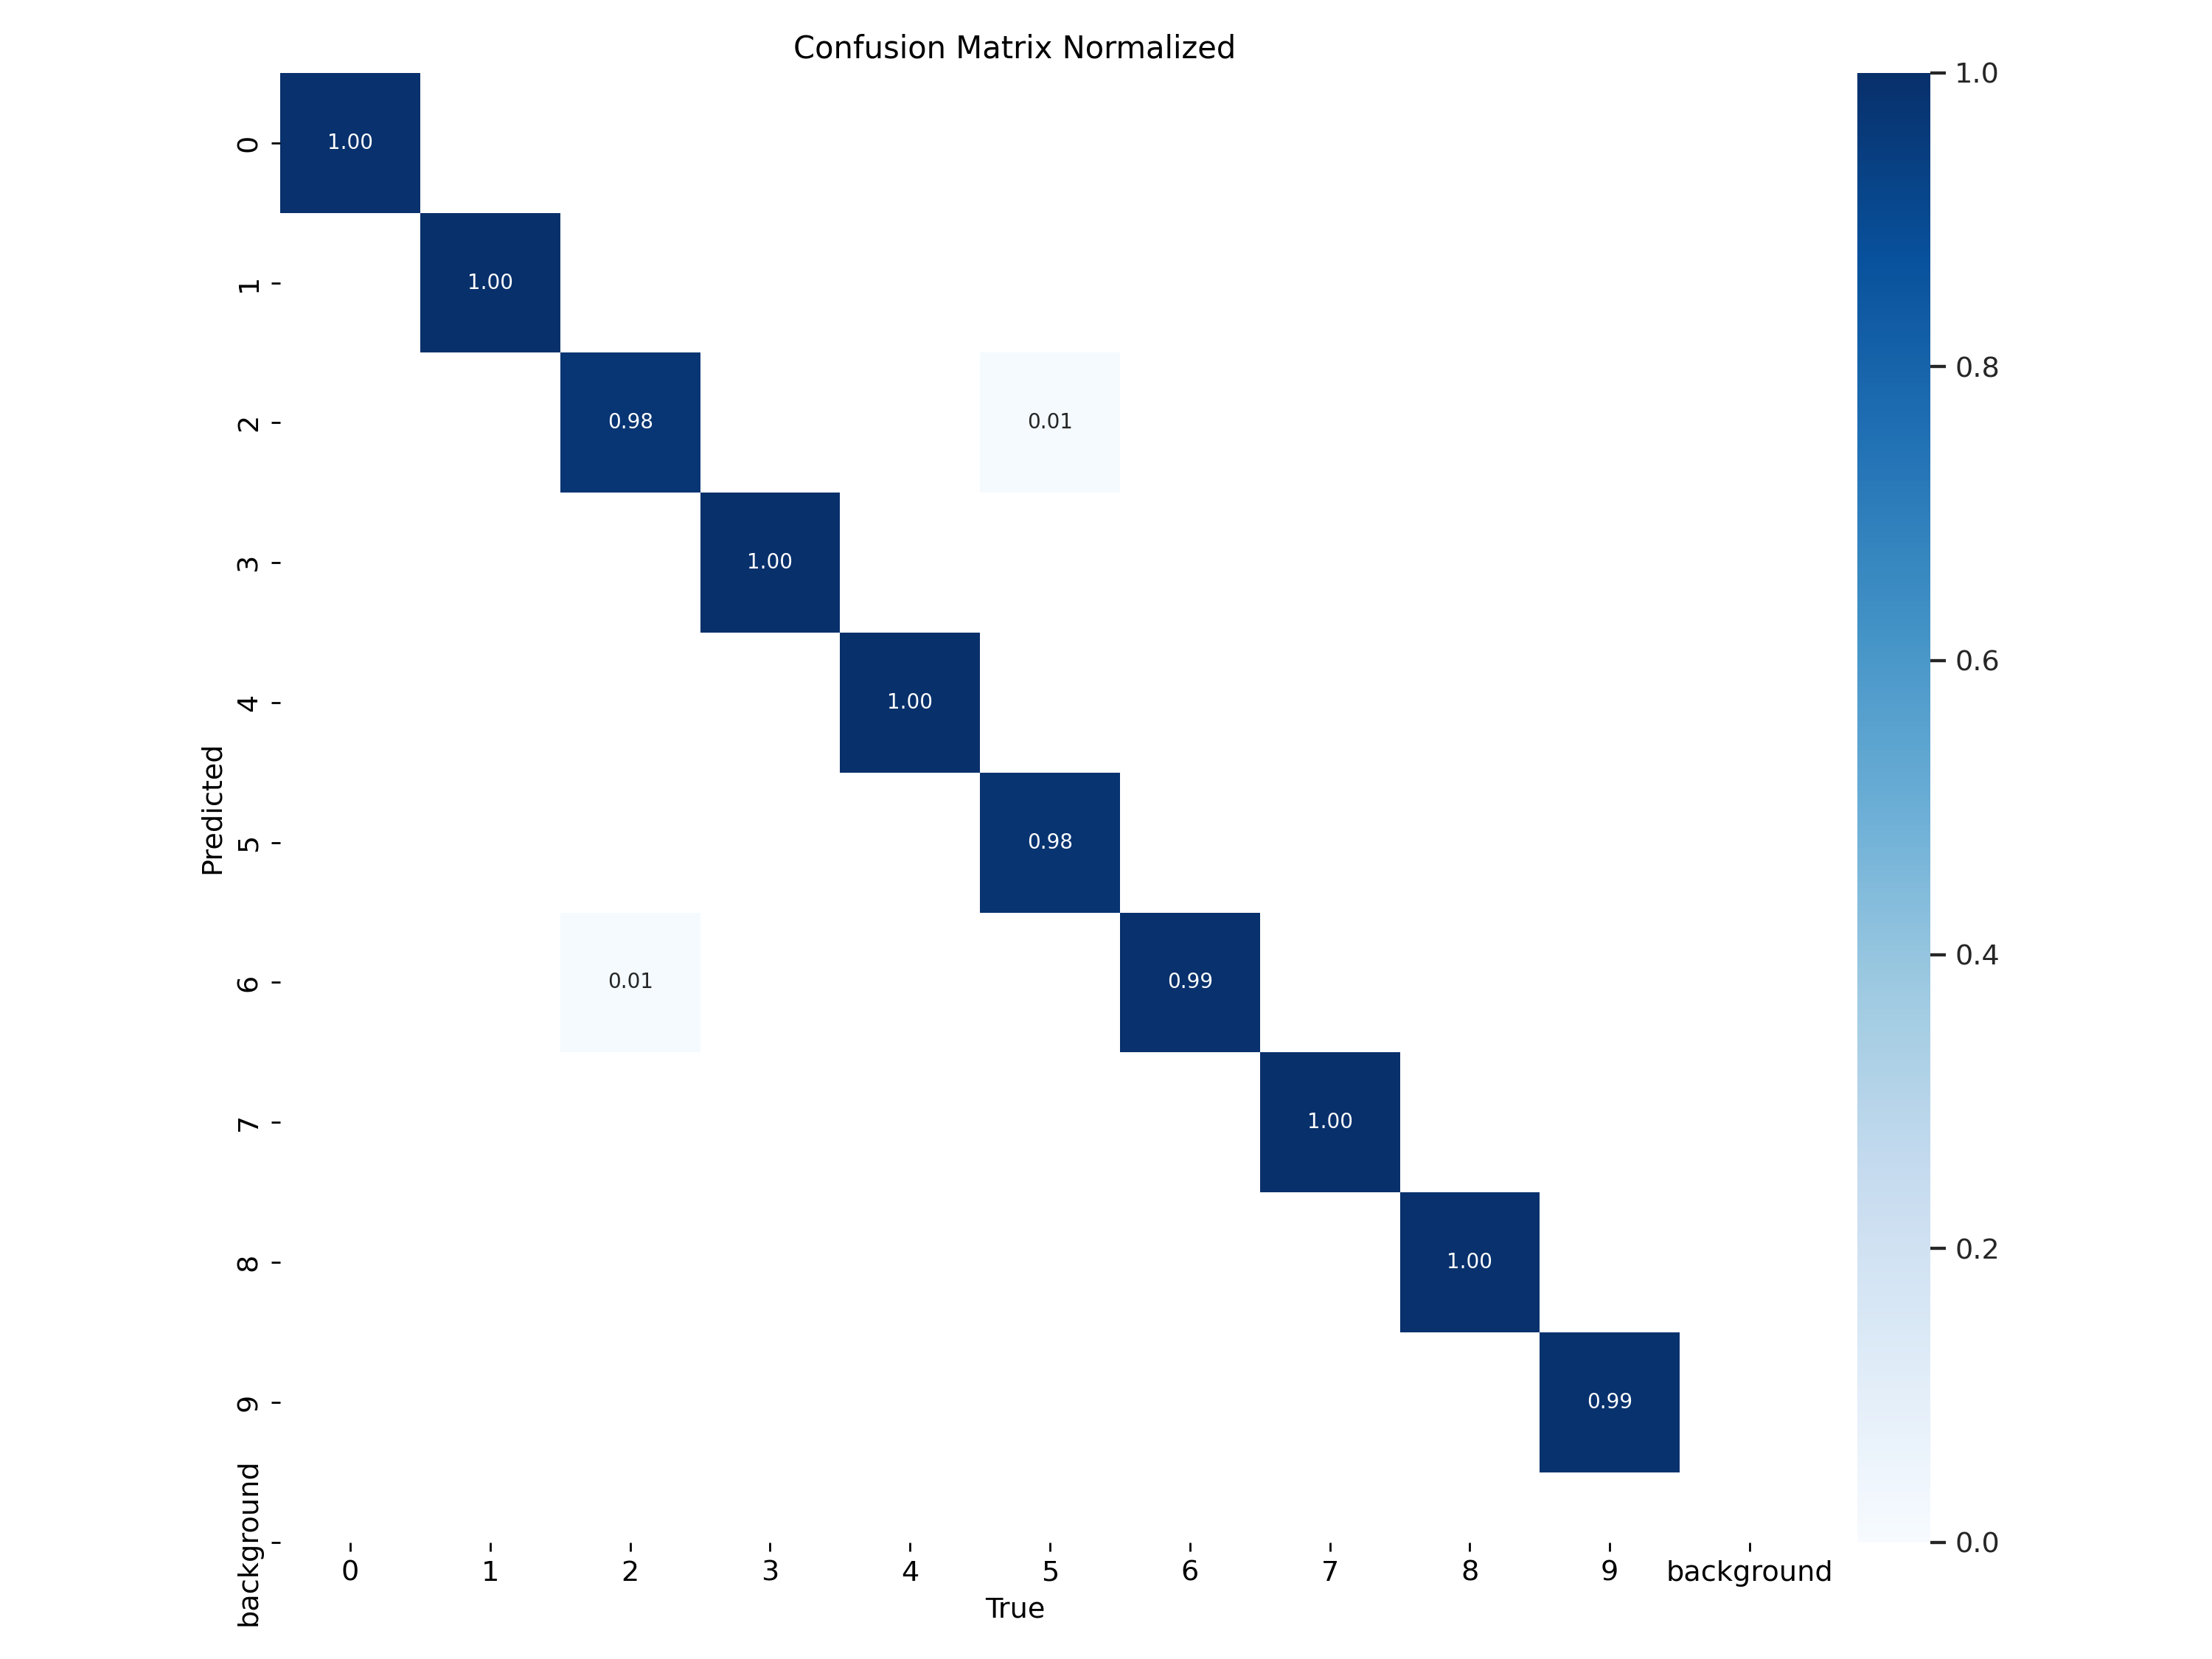

In [9]:
Image(filename=f'/content/runs/classify/train/confusion_matrix_normalized.png', width=600)

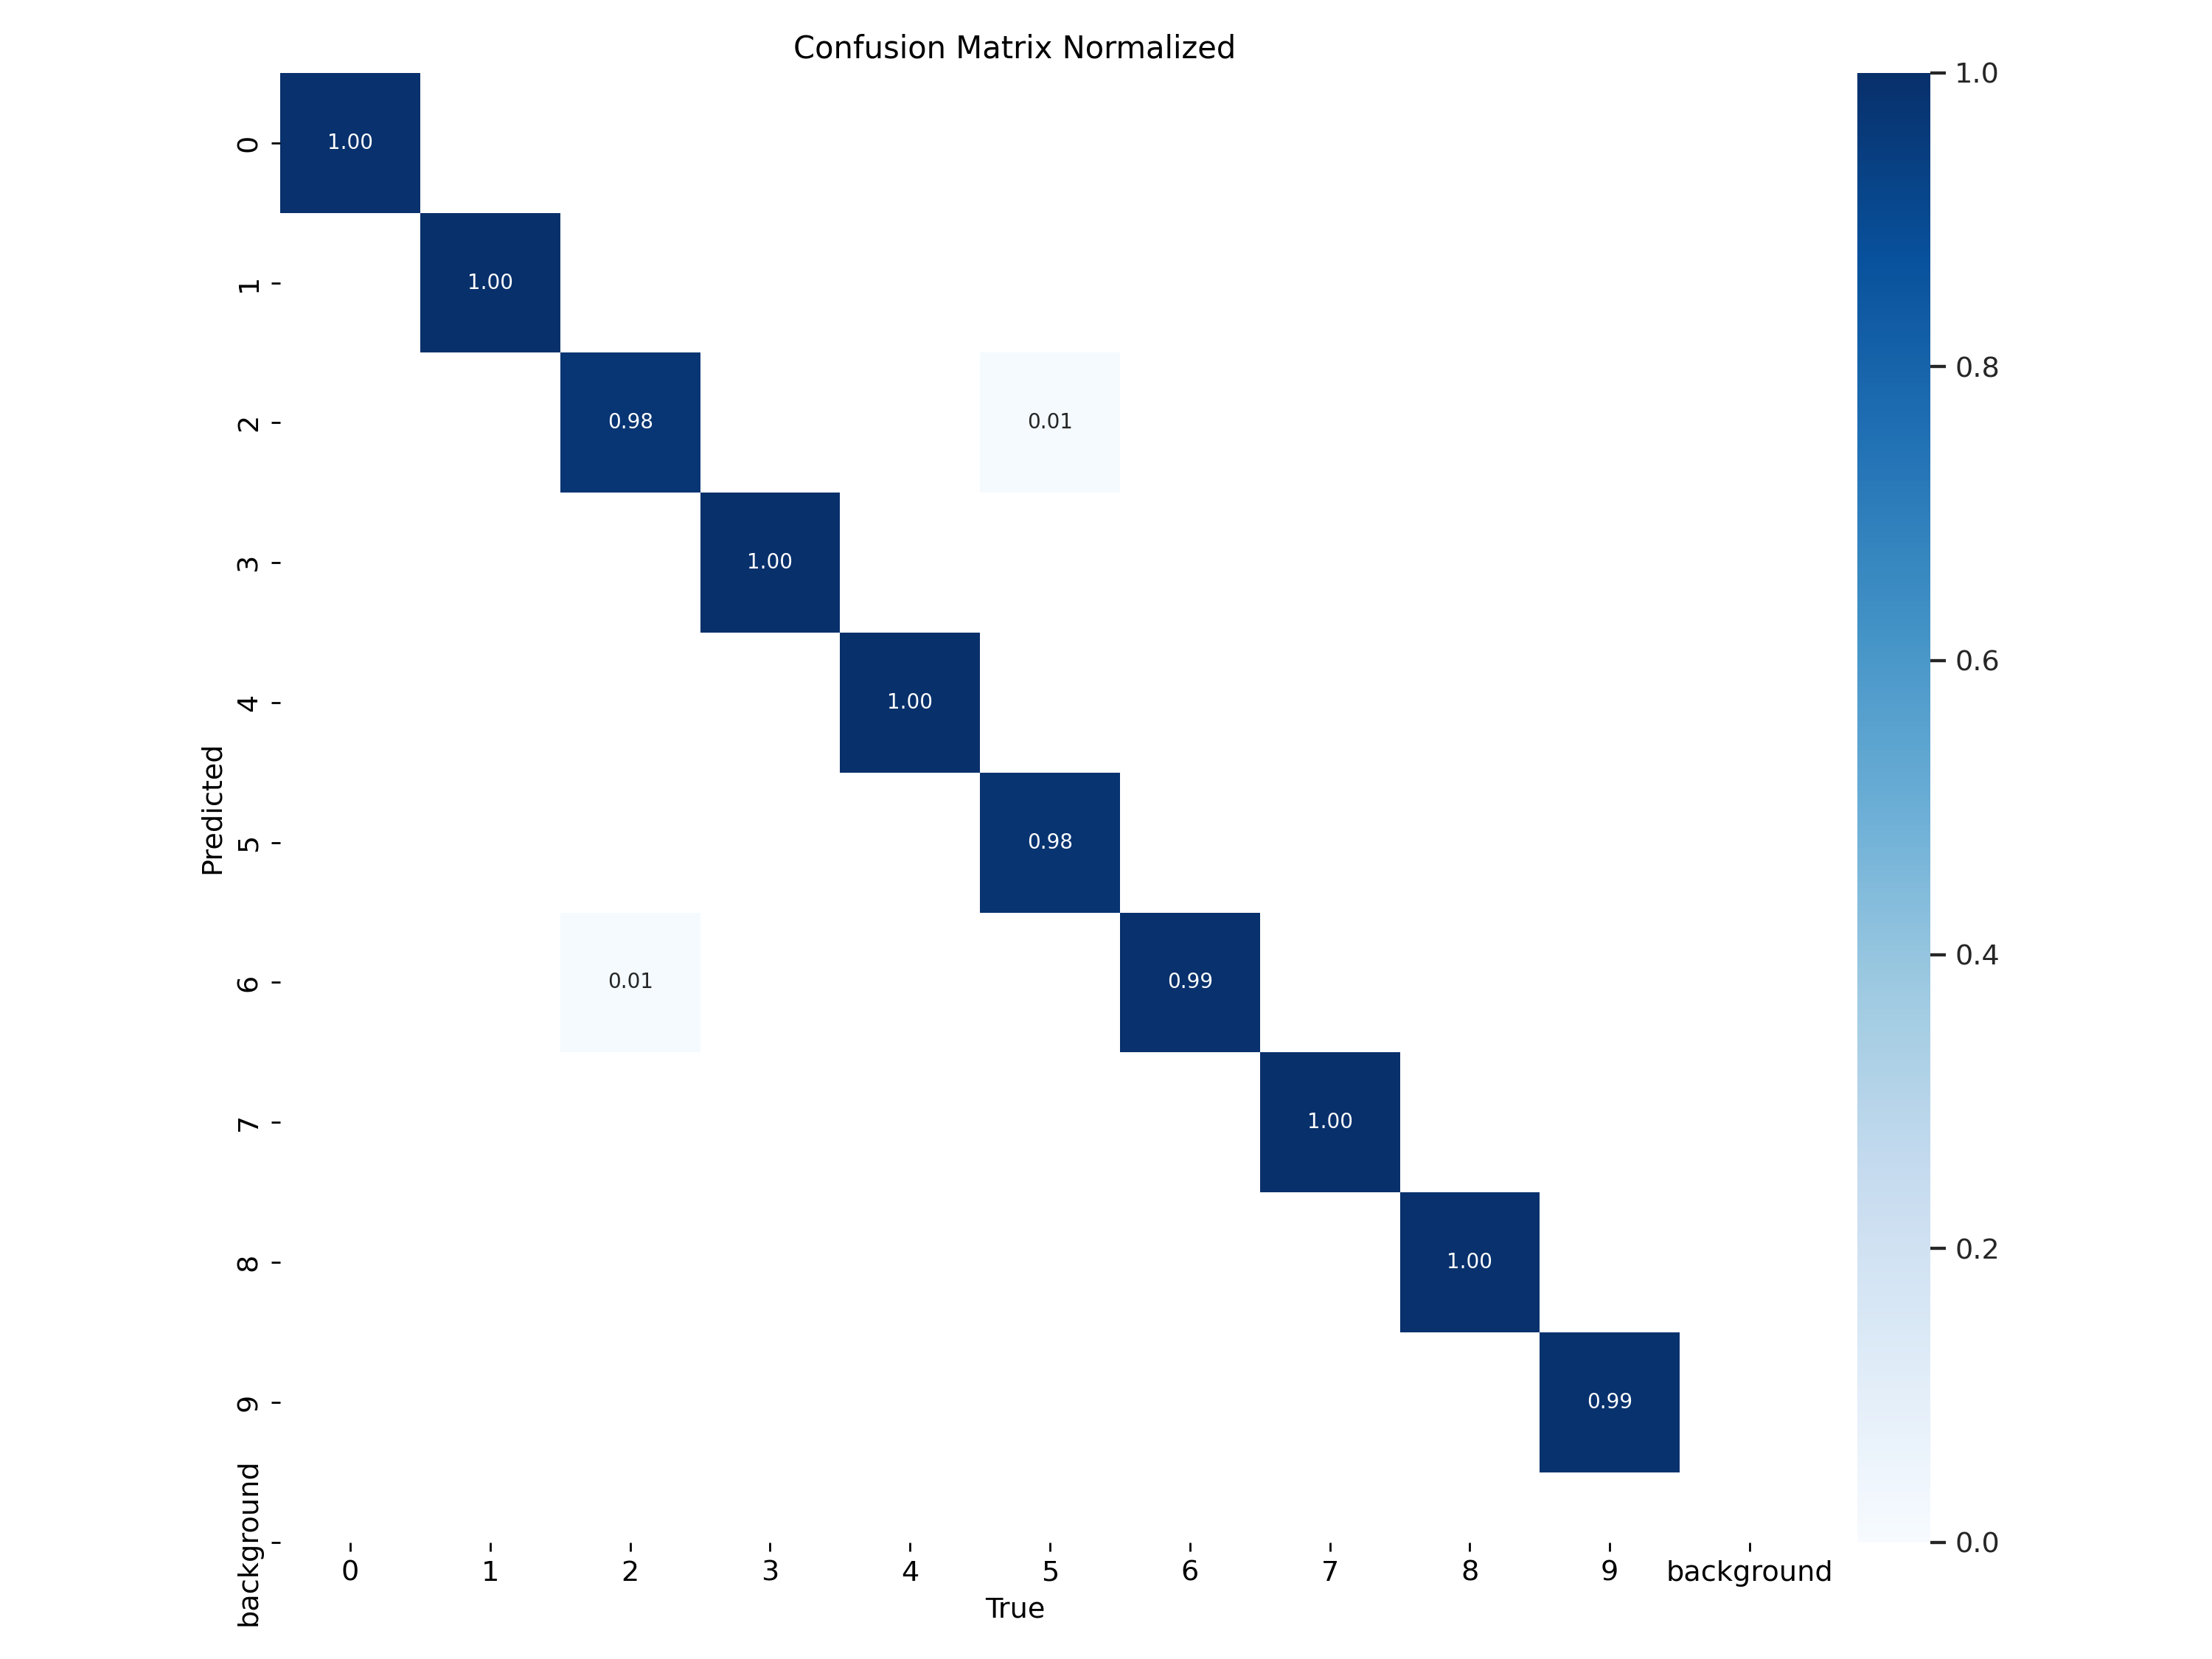

In [10]:
Image(filename=f'/content/runs/classify/train/confusion_matrix_normalized.png', width=600)

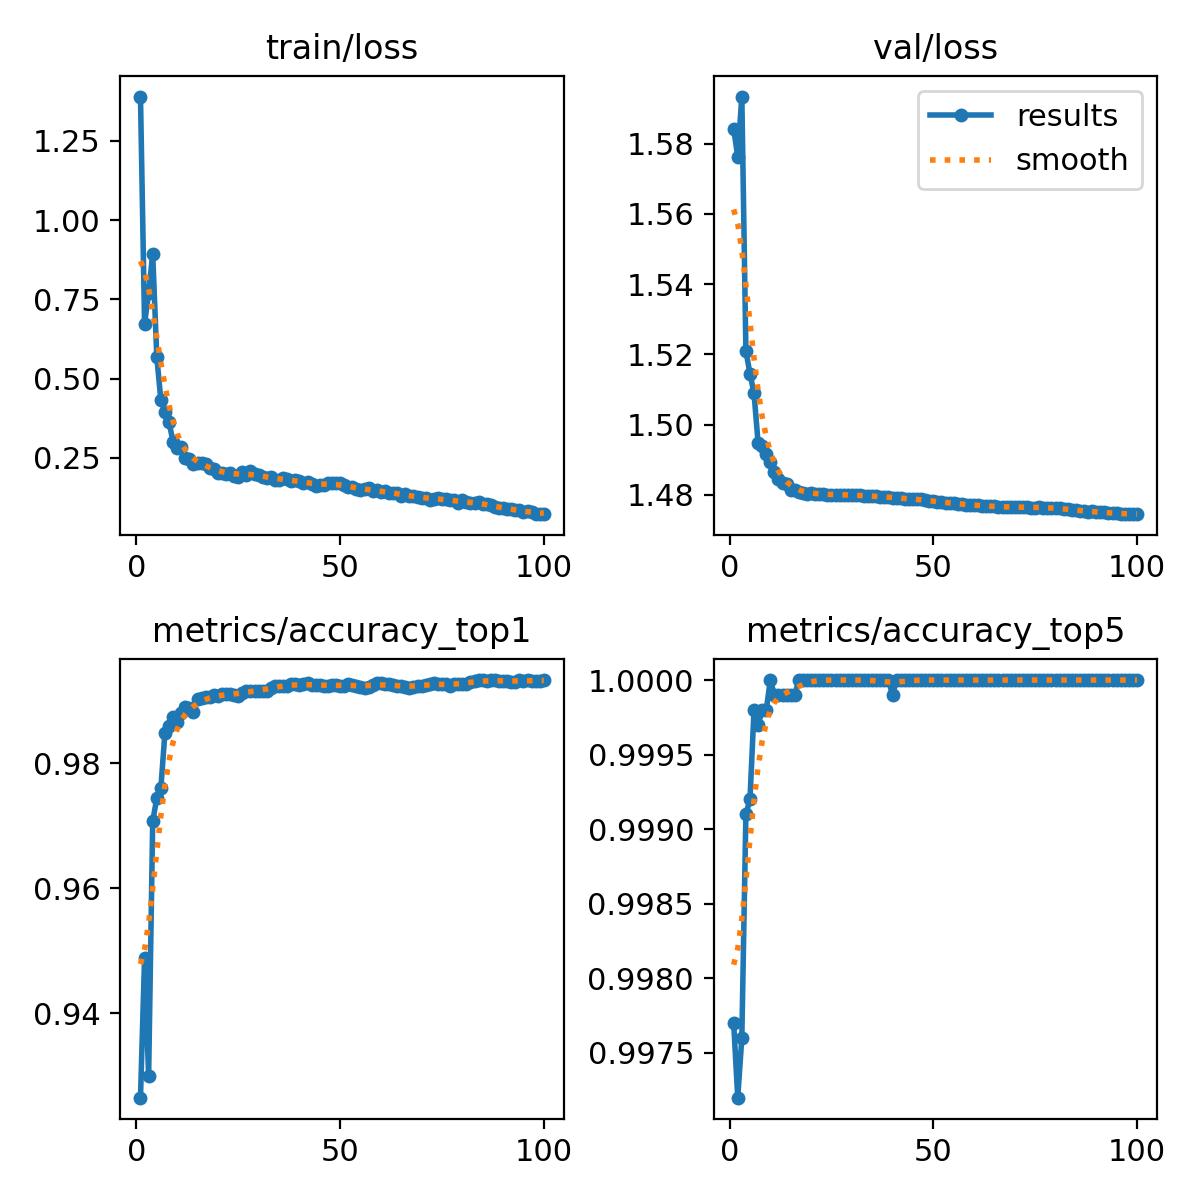

In [11]:
Image(filename=f'/content/runs/classify/train/results.png', width=600)

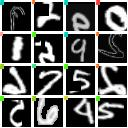

In [12]:
Image(filename=f'/content/runs/classify/train/train_batch0.jpg', width=600)